##  Problem 1

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
gng = pd.read_csv("GNG4_exons.tsv", sep="\t", index_col=0, header=None, usecols=[3,4])
spr = pd.read_csv("SPRR4_exons.tsv", sep="\t", index_col=0, header=None, usecols=[3,4])

In [4]:
gng.reset_index(inplace=True)
gng = gng.rename(columns={3: "start", 4: "end"})
gng = gng.sort_values(by='start', ignore_index=True)
spr.reset_index(inplace=True)
spr = spr.rename(columns={3: "start", 4: "end"})
spr.sort_values(by='start', inplace=True, ignore_index=True)

TypeError: sort_values() got an unexpected keyword argument 'ignore_index'

In [16]:
length = gng['end'][0] - gng['start'][0]
for i in range(1,17):
    if gng['end'][i-1] > gng['start'][i]:
        length += gng['end'][i] - gng['start'][i] - (gng['end'][i-1] - gng['start'][i])
    else:
        length += gng['end'][i] - gng['start'][i]
print("The exon lenght of GNG4 gene is", length)

The exon lenght of GNG4 gene is 5395


In [17]:
length = spr['end'][0] - spr['start'][0]
for i in range(1,2):
    if spr['end'][i-1] > spr['start'][i]:
        length += spr['end'][i] - spr['start'][i] - (spr['end'][i-1] - spr['start'][i])
    else:
        length += spr['end'][i] - spr['start'][i]
print(length)

731


## Problem 2

In [18]:
df = pd.read_csv("./homework/TCGA-COAD_cancer_normal.tsv", sep="\t", index_col=0)
df = df.loc[df.min(axis=1) > 0] #фильтр на 0 гены
df["Pseudo-sample"] = 2**((np.log2(df)).mean(axis=1)) #среднеарифмет для лг и обр квадрат
df = df.div(df["Pseudo-sample"], axis=0) #делим столбцы
a = list(df.median(axis=0))

In [19]:
print(a)
print(df)

[0.3521965641887188, 0.39439086144751867, 0.7305734402506029, 1.6613807884976428, 1.6000283761172207, 1.48313615756963, 1.2804697093264523, 0.9243427405663928, 1.593067989583141, 1.3499769758243512, 1.0]
                              TCGA-A6-2682-01A  TCGA-A6-2683-01A  \
Gene                                                               
A1CF                                  0.250286          0.134040   
A2M                                   0.141030          0.134129   
A2M-AS1                               0.228552          0.114276   
A4GALT                                0.445143          0.123000   
AAAS                                  0.492967          0.717372   
...                                        ...               ...   
ZYX                                   0.491470          0.727319   
ZZEF1                                 0.120634          0.353902   
ZZZ3                                  0.467076          0.270950   
chr22-38_28785274-29006793.1          0.297660  

## Problem 3

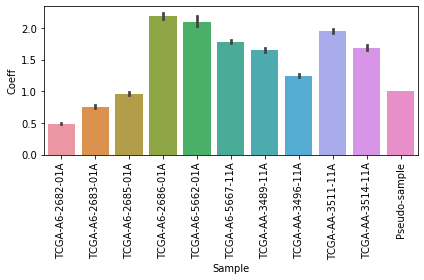

In [20]:
df = df.melt(var_name="Sample", value_name="Coeff") #сбор столбцов в 2
#print(df)
estimator=np.median #значение будет равно медиане
sns.barplot(data=df, x="Sample", y="Coeff")
plt.xticks(rotation=90) # просто название столбцов перевернули
plt.tight_layout()
plt.savefig("task2.pdf")

## Problem 4

In [17]:
gl = pd.read_csv("gene_lengths.tsv", sep="\t", index_col=0)
df = pd.read_csv("TCGA-COAD_cancer_normal.tsv", sep="\t", index_col=0)

In [18]:
RPM = df.div(df.sum(axis=0) / 10**6, axis=1)
RPKM = RPM.div(gl["Length"] / 10**3, axis=0)

In [19]:
# сохраняем таблицы без нормализации
dfwn = df
RPKMwn = RPKM

# с нормализацией (без изменений)
size_factors = [0.35219656, 0.39439086, 0.73057344, 1.66138079, 1.60002838, 1.48313616, 1.28046971, 0.92434274, 1.59306799, 1.34997698]
RPKM = RPKM.div(size_factors, axis=1) # делим на нормированные коэффициенты

#отброс низкоэкспрессируемых генов с помощью медианы
df = np.log2(RPKM + 1)
df = df.loc[df.max(axis=1) > 0]
df["median"] = df.median(axis=1)
df = df.sort_values("median", ascending=False)
df = df.iloc[:len(df)//2]

df["LFC"] = df.iloc[:, 0:5].mean(axis=1) - df.iloc[:, 5:10].mean(axis=1) #fold change
df["absLFC"] = np.abs(df["LFC"])
df = df.sort_values("absLFC", ascending=False)
a = list(df["absLFC"].head(100).index)

In [20]:
# тоже сакмое но без нормировочного коэф, не делим на size factors
RPKM_1 = RPM.div(gl["Length"] / 10**3, axis=0)

dfwn = np.log2(RPKM_1 + 1)
dfwn = dfwn.loc[dfwn.max(axis=1) > 0]
dfwn["median"] = dfwn.median(axis=1)
dfwn = dfwn.sort_values("median", ascending=False)
dfwn = dfwn.iloc[:len(dfwn)//2]

dfwn["LFC_1"] = dfwn.iloc[:, 0:5].mean(axis=1) - dfwn.iloc[:, 5:10].mean(axis=1)
dfwn["absLFC_1"] = np.abs(dfwn["LFC_1"])
dfwn = dfwn.sort_values("absLFC_1", ascending=False)
b = list(dfwn["absLFC_1"].head(100).index)

# пересечение
n = list(set(a).intersection(set(b)))
print(n)

['TMIGD1', 'IGHJ3P', 'PLAC8', 'FOXQ1', 'GUCA2B', 'NXPE4', 'GDF15', 'CA7', 'ANPEP', 'CHGA', 'TGFBI', 'CLCA4', 'CA4', 'MMP11', 'SPP1', 'UGT2A3', 'GCG', 'SST', 'MMP7', 'PYY', 'SULT2B1', 'IGHA2', 'KRT23', 'AQP8', 'KRT8P36', 'VSIG2', 'MS4A12', 'SLC4A4', 'AZGP1', 'OTOP2', 'INSL5', 'HOXB8', 'GUCA2A', 'KRT80', 'TRIB3', 'KLK10', 'CA1', 'ADH1C', 'MT1E', 'CST1', 'UGT2B17', 'TACSTD2', 'BEST4', 'CDH3', 'ZG16', 'MT1H', 'GYLTL1B', 'SLC26A2', 'CA2', 'SLC26A3', 'MT1G', 'ETV4', 'CLCA1', 'IGJ', 'MT1M', 'ITLN1', 'RP11-329L6.2', 'PLA2G2A', 'CD177', 'CPNE7', 'GRIN2D', 'CLDN1', 'CEACAM7', 'CEMIP', 'FABP6', 'DPEP1', 'TESC']


Рисуем график:

In [24]:
import seaborn as sns
from matplotlib import rcParams

In [25]:
idf = pd.DataFrame({"normalized": [], "without norm": []})
idf = idf.T
for i in n:
    idf.loc['normalized', i] = df.loc[i, 'LFC']
    idf.loc["without norm", i] = dfwn.loc[i, "LFC_1"]
idf = idf.T

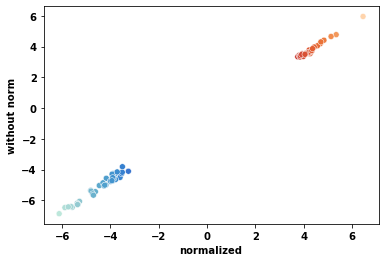

In [27]:
g = sns.scatterplot(data = idf, x="normalized", y="without norm", palette = 'icefire', hue = 'normalized')
g.legend().set_visible(False)
rcParams['lines.markersize'] = 8
rcParams['lines.markersize'] = 15
rcParams['lines.markersize'] = 15

plt.show()

## Problem 5

In [31]:
gl = pd.read_csv("gene_lengths.tsv", sep="\t", index_col=0)
df = pd.read_csv("TCGA-COAD_cancer_normal.tsv", sep="\t", index_col=0)

In [32]:
RPM = df.div(df.sum(axis=0) / 10**6, axis=1)
RPKM = RPM.div(gl["Length"] / 10**3, axis=0)

In [33]:
size_factors = [0.35219656, 0.39439086, 0.73057344, 1.66138079, 1.60002838, 1.48313616, 1.28046971, 0.92434274, 1.59306799, 1.34997698]
RPKM = RPKM.div(size_factors, axis=1) # делим на нормированные коэффициенты

In [34]:
df = np.log2(RPKM_1 + 1)
df = df.loc[df.max(axis=1) > 0]
df["median"] = df.median(axis=1)
df = df.sort_values("median", ascending=False)
df = df.iloc[:len(df)//2]

In [35]:
# новая часть
df['variance'] = np.var(df.iloc[:, :len(df.columns)-1], axis=1)
df = df.sort_values('variance')
print((df.iloc[:10]).index)
df.head(10)

Index(['TMEM233', 'HEATR4', 'SPATA1', 'RP11-274H2.3', 'ZMYND10',
       'CTD-2192J16.20', 'NPM1P24', 'SLC9B1', 'RTEL1', 'ANO2'],
      dtype='object', name='Gene')


,TCGA-A6-2682-01A,TCGA-A6-2683-01A,TCGA-A6-2685-01A,TCGA-A6-2686-01A,TCGA-A6-5662-01A,TCGA-A6-5667-11A,TCGA-AA-3489-11A,TCGA-AA-3496-11A,TCGA-AA-3511-11A,TCGA-AA-3514-11A,median,variance
Gene,,,,,,,,,,,,
TMEM233,0.153053,0.128474,0.165807,0.164779,0.192661,0.160984,0.132719,0.140362,0.115629,0.094656,0.146708,0.000726
HEATR4,0.170542,0.217150,0.203794,0.198563,0.127271,0.228442,0.122531,0.136569,0.235752,0.116996,0.184553,0.001959
SPATA1,0.162690,0.110324,0.065142,0.231284,0.100353,0.203002,0.155544,0.166154,0.171174,0.132819,0.159117,0.002185
RP11-274H2.3,0.168840,0.096098,0.163620,0.079312,0.194187,0.158858,0.091908,0.183989,0.118290,0.233299,0.161239,0.002293
ZMYND10,0.178545,0.212080,0.145605,0.220219,0.085633,0.161397,0.097339,0.100529,0.171117,0.086895,0.153501,0.002338
CTD-2192J16.20,0.183025,0.253107,0.223031,0.193662,0.214693,0.112396,0.089093,0.164461,0.220946,0.207642,0.200652,0.002373
NPM1P24,0.135485,0.149585,0.067117,0.210223,0.156091,0.032917,0.176855,0.147793,0.124797,0.162614,0.148689,0.002411
SLC9B1,0.122614,0.069306,0.210774,0.207620,0.202863,0.151715,0.209963,0.189511,0.139798,0.083679,0.170613,0.002596
RTEL1,0.216007,0.315425,0.270162,0.210470,0.340068,0.233301,0.179191,0.201811,0.241107,0.184482,0.224654,0.002634
